In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [4]:
df = pd.read_csv('UN.csv')

In [5]:
df.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rows = df.shape[0]
print('total rows {}'.format(rows))

total rows 207


In [7]:
rows - df.isnull().sum()

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64

In [8]:
# best to cluster on infantmortality, lifeMale, lifeFemale

In [9]:
for col in df.columns.values:
    print('{} : {}'.format(col, df[col].dtype))

country : object
region : object
tfr : float64
contraception : float64
educationMale : float64
educationFemale : float64
lifeMale : float64
lifeFemale : float64
infantMortality : float64
GDPperCapita : float64
economicActivityMale : float64
economicActivityFemale : float64
illiteracyMale : float64
illiteracyFemale : float64


In [10]:
len(df['country'].unique()) # unique returns list.  len gives length. Prevents counting duplicates.

207

In [11]:
#Apply scipy.cluster.vq.kmeans 1 to 10 and determine the cluster centroids.


In [114]:
from scipy.cluster.vq import kmeans, whiten, vq

In [13]:
features = ['lifeMale','lifeFemale','infantMortality','GDPperCapita']

In [45]:
df_features = df[features]

In [46]:
df_features.head()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,45.0,46.0,154,2848
1,68.0,74.0,32,863
2,67.5,70.3,44,1531
3,68.0,73.0,11,NaN
4,NaN,NaN,NaN,NaN


In [47]:
df_features_clean = df_features.dropna() 

In [48]:
df_features_clean.shape

(188, 4)

In [52]:
ar_whiten = whiten(df_features_clean)
# whiten function normalizes the df

In [53]:
ar_centroids = kmeans(ar_whiten , 10) # this generates the codebook with whitened centroid values

In [56]:
ar_centroids

(array([[ 4.73891584,  4.46290713,  2.83381706,  0.03232314],
        [ 7.57162724,  7.17220628,  0.22647459,  2.043228  ],
        [ 5.92734851,  5.45905091,  1.87721552,  0.1585886 ],
        [ 4.3559465 ,  4.06808367,  3.66364083,  0.07454862],
        [ 6.7418259 ,  6.61355682,  0.56452935,  0.29259488],
        [ 7.35584461,  7.09031481,  0.27066476,  1.15659281],
        [ 6.63764845,  6.28846415,  1.14502418,  0.16406281],
        [ 5.21459989,  4.89798179,  2.0980099 ,  0.09440701],
        [ 7.61548268,  7.29104312,  0.14779155,  3.38829266],
        [ 7.20375448,  6.85702375,  0.4618486 ,  0.30190503]]),
 0.38931660538177959)

In [121]:
centroid_vectors = vq(ar_whiten,ar_centroids[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A24E160>]], dtype=object)

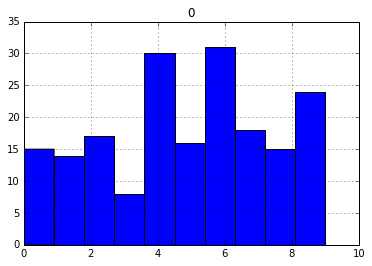

In [124]:
pd.DataFrame(centroid_vectors[0]).hist()

In [58]:
df_features_clean.head()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,45.0,46.0,154,2848
1,68.0,74.0,32,863
2,67.5,70.3,44,1531
5,44.9,48.1,124,355
7,69.6,76.8,22,8055


In [59]:
ar_features_clean = np.array(df_features_clean)

In [120]:
for row_cnt, val in enumerate(ar_whiten):
    cast1 = ar_whiten[row_cnt] - ar_centroids[0]
    print(cast1.sum())
    centroid_group = min(enumerate(cast1), key = lambda x: sum(x[1]))[0]  # this lambda function will find the min
    print("Row {} is in Centroid group {}".format(row_cnt, centroid_group))

-14.1052778643
Row 0 is in Centroid group 8
1.0242525679
Row 1 is in Centroid group 8
1.01143188467
Row 2 is in Centroid group 8
-22.8443276779
Row 3 is in Centroid group 8
10.6995734475
Row 4 is in Centroid group 8
-2.16932536281
Row 5 is in Centroid group 8
29.9598363522
Row 6 is in Centroid group 8
37.3038661825
Row 7 is in Centroid group 8
-0.406680043864
Row 8 is in Centroid group 8
14.8762609296
Row 9 is in Centroid group 8
10.9878779008
Row 10 is in Centroid group 8
-12.1731640411
Row 11 is in Centroid group 8
12.1594420386
Row 12 is in Centroid group 8
-6.16271251618
Row 13 is in Centroid group 8
35.4925292983
Row 14 is in Centroid group 8
9.8399776265
Row 15 is in Centroid group 8
-17.2260601095
Row 16 is in Centroid group 8
-15.2207522233
Row 17 is in Centroid group 8
-8.30087200281
Row 18 is in Centroid group 8
-0.267991692119
Row 19 is in Centroid group 8
-29.33901995
Row 20 is in Centroid group 8
0.473375634661
Row 21 is in Centroid group 8
22.1056968543
Row 22 is in Centr

In [112]:
for data_counter, val in enumerate(ar_features_clean):

    row_sub_sum= None
    row_sub_sum_min = None
    member_of = None
    for centroid_counter, values in enumerate(ar_centroids[0]):
    #     print(centroid_counter)
        row_sub_sum = (ar_features_clean[data_counter] - ar_centroids[0][centroid_counter]).sum()
#         print(row_sub_sum)
        if centroid_counter == 0:
            row_sub_sum_min = row_sub_sum
            member_of = 0
        elif row_sub_sum <= row_sub_sum_min: # what to do if equal?:
            row_sub_sum_min = row_sub_sum
            member_of = centroid_counter
    print("Difference of features and whitened centroid values is least at {}. \
    As such data row {} is a member of centroid {}.".format(row_sub_sum_min,data_counter,member_of))

Difference of features and whitened centroid values is least at 3074.55738999.     As such data row 0 is a member of centroid 8.
Difference of features and whitened centroid values is least at 1018.55738999.     As such data row 1 is a member of centroid 8.
Difference of features and whitened centroid values is least at 1694.35738999.     As such data row 2 is a member of centroid 8.
Difference of features and whitened centroid values is least at 553.557389992.     As such data row 3 is a member of centroid 8.
Difference of features and whitened centroid values is least at 8204.95738999.     As such data row 4 is a member of centroid 8.
Difference of features and whitened centroid values is least at 501.757389992.     As such data row 5 is a member of centroid 8.
Difference of features and whitened centroid values is least at 20190.15739.     As such data row 6 is a member of centroid 8.
Difference of features and whitened centroid values is least at 29147.35739.     As such data row 7

In [24]:
# must need to whiten the df too - comparing whitened centroids to non-whitened df doesn't make seense.

In [44]:
dfcb.iloc[0] - arr10[0][0]

lifeMale           0
lifeFemale         0
infantMortality    0
GDPperCapita       0
Name: 0, dtype: float64

In [26]:
# experimental section


In [27]:
a1 = dfw2.iloc[0,]

In [28]:
a1


lifeMale             45
lifeFemale           46
infantMortality     154
GDPperCapita       2848
Name: 0, dtype: float64

In [29]:
na1 = np.array(a1)

In [30]:
na1 , arr10[0][0]

(array([   45.,    46.,   154.,  2848.]),
 array([ 6.53455789,  6.61807942,  0.41244154,  0.25647872]))

In [31]:
r1 = na1 - arr10[0][0]

In [32]:
r1

array([   38.46544211,    39.38192058,   153.58755846,  2847.74352128])

In [95]:
ar_features_clean[0]

array([   45.,    46.,   154.,  2848.])

In [96]:
ar_centroids[0]

array([[ 4.73891584,  4.46290713,  2.83381706,  0.03232314],
       [ 7.57162724,  7.17220628,  0.22647459,  2.043228  ],
       [ 5.92734851,  5.45905091,  1.87721552,  0.1585886 ],
       [ 4.3559465 ,  4.06808367,  3.66364083,  0.07454862],
       [ 6.7418259 ,  6.61355682,  0.56452935,  0.29259488],
       [ 7.35584461,  7.09031481,  0.27066476,  1.15659281],
       [ 6.63764845,  6.28846415,  1.14502418,  0.16406281],
       [ 5.21459989,  4.89798179,  2.0980099 ,  0.09440701],
       [ 7.61548268,  7.29104312,  0.14779155,  3.38829266],
       [ 7.20375448,  6.85702375,  0.4618486 ,  0.30190503]])

In [93]:
cast1 = ar_features_clean[0] - ar_centroids[0]

In [99]:
45 - 4.73, 46 - 4.46 , 45 - 7.51

(40.269999999999996, 41.54, 37.49)

In [94]:
cast1 # casting will subtract a data row from all values in the centroid

array([[   40.26108416,    41.53709287,   151.16618294,  2847.96767686],
       [   37.42837276,    38.82779372,   153.77352541,  2845.956772  ],
       [   39.07265149,    40.54094909,   152.12278448,  2847.8414114 ],
       [   40.6440535 ,    41.93191633,   150.33635917,  2847.92545138],
       [   38.2581741 ,    39.38644318,   153.43547065,  2847.70740512],
       [   37.64415539,    38.90968519,   153.72933524,  2846.84340719],
       [   38.36235155,    39.71153585,   152.85497582,  2847.83593719],
       [   39.78540011,    41.10201821,   151.9019901 ,  2847.90559299],
       [   37.38451732,    38.70895688,   153.85220845,  2844.61170734],
       [   37.79624552,    39.14297625,   153.5381514 ,  2847.69809497]])

In [106]:
# minidx = min(enumerate(data), key=lambda x:sum(x[1]))[0]
test1 = min(enumerate(cast1), key = lambda x: sum(x[1]))[0]  # this lambda function will find the 
# row with the min difference

test1

8

In [100]:
cast1 = ar_features_clean - ar_centroids[0]

ValueError: operands could not be broadcast together with shapes (188,4) (10,4) 

In [ ]:
# print(df.i_class.unique())
c_chart = ['red','green','blue']
for idx, val in enumerate(df.i_class.unique()):
    df1 = df[df['i_class'] == val]
    y = df1['s_width']
    x = df1['s_length']
    plt.scatter(x,y, color = c_chart[idx])
plt.title('Iris Graph')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
red_patch = mpatches.Patch(color='red', label='Setosa')
blue_patch = mpatches.Patch(color='blue', label = 'Versicolor')
green_patch = mpatches.Patch(color='green', label = 'Virginica')
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.show()

In [ ]:
# Determine k.
# Calculate the distance between the new observation and all points in the training set.
# Sort the distances to determine the k nearest neighbors based on the k-th minimum distance.
# Determine the class of those neighbors.
# Determine the majority.

In [ ]:
def get_majority(dfrnd):

#     print(dfrnd)
    # set the values for length and width from random row for distance calculations

    rnd_length = dfrnd['s_length']
    rnd_width = dfrnd['s_width']
#     print("sepal length in my random row is {}".format(rnd_length))
   

    # calculate the distance between the random point and all points in the array based on pythagorean thereom

    df['length_dif'] = rnd_length - df['s_length']
    df['width_dif'] = rnd_width - df['s_width']
    df['dist'] = np.sqrt(df.length_dif **2 + df.width_dif **2)

    # sort the data by distance
    dfsort = df.sort(['dist'], ascending = [True])

    # create a new df with only k nearest neighbors
    dfk = dfsort.head(k)
#     print("nearest neighbors sorted by distance ")
#     print(dfk)
    
    # Vote on majority class
    setosa_cnt = 0
    versicolor_cnt = 0
    virginica_cnt = 0

    # count number of each type

    setosa_cnt = dfk[df['i_class'] == 'Iris-setosa'].s_length.count()
    versicolor_cnt = dfk[df['i_class'] == 'Iris-versicolor'].s_length.count()
    virginica_cnt = dfk[df['i_class'] == 'Iris-virginica'].s_length.count()
#     print(setosa_cnt, versicolor_cnt, virginica_cnt)

    count_dict = {'Iris-setosa': setosa_cnt, 'Iris-versicolor': versicolor_cnt, 'Iris-virginica': virginica_cnt}
#     print(count_dict)

    majority = max(count_dict, key=lambda key: count_dict[key])
#     print("Majority vote is {} and actual is {}".format(majority, dfrnd['i_class']))


    return(majority)


In [ ]:
k = 5

len(df)

In [ ]:
# df['majority'] = [get_majority(data,k) for index, data in df['i_class'].iteritems()]
# raw_data['Loan.Length'] = [get_int_from_text(data) for index, data in raw_data['Loan.Length'].iteritems()]
df['majority'] = False

for x in range(len(df)):
# for x in range(5):
    majority = get_majority(df.iloc[x])
#     print(majority)
    df.loc[x,'majority'] = majority # loc works here but iloc does not

In [ ]:
# df[df['i_class' != 'majority']].count()
print("Number of mislabeled points out of a total %d points : %d"
% (df.shape[0],(df.i_class != df.majority).sum()))

In [ ]:
df[df['i_class'] != df['majority']]

In [ ]:
df1 = df[df['i_class'] != df['majority']]
y = df1['s_width']
x = df1['s_length']
plt.scatter(x,y, color = 'red')

df2 = df[df['i_class'] == df['majority']]
y2 = df2['s_width']
x2 = df2['s_length']
plt.scatter(x2,y2, color = 'green')

plt.title('Iris Graph')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
red_patch = mpatches.Patch(color='red', label='Missed')
green_patch = mpatches.Patch(color='green', label = 'Hit')
plt.legend(handles=[red_patch, green_patch])
plt.show()

In [ ]:
a = pd.scatter_matrix(df, alpha=0.05, figsize=(10,10), diagonal='hist')
